### PAIR

**VISUALIZACIÓN I**

ARCHIVO: world_data_full_apply_nulos.csv

### **Ejercicios visualización**

A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?
2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.
3. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.
4. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):

* Todas deben llevar título.
* Los nombres de los ejes deben estar en castellano.
* En los *scatterplot* los puntos deben tener un tamaño de 2.
* En los *scatterplot* los puntos deben tener un color diferente al azul.
* En los *barplot* las barras siempre tienen que estar ordenadas de mayor a menor.
* En los *barplot* y *countplot* las barras tienen que tener un color diferente a los que vienen por defecto.
* En los *pieplot* siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.


In [2]:
import pandas as pd
import numpy as np

# Imputación de nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

**Visualización con Seaborn**

- sns.histplot(data=df, x="variable", bins=10, kde=True, color="blue")
- plt.show()

**scatterplot**
- diagrama de dispersión o gráfico XY. Cada punto en el gráfico indica el valor de ambas variables para ese punto de datos específico.
- sirve para identificar patrones, tendencias o correlaciones entre las dos variables. **¿Existen valores atípicos o puntos que se desvíen de la tendencia general?**

- sns.scatterplot(data=df, x="variable_x", y="variable_y", hue="categoria")

**regplot**
- se utiliza para trazar un gráfico de dispersión (scatter plot) junto con una línea de regresión lineal - esta, muestra la tendencia general de la relación entre dos variables y puede ayudar a identificar patrones o tendencias en los datos.
- útil para identificar la dirección y la fuerza de la relación entre las variables, y para evaluar si existe una correlación lineal entre ellas.

- sns.regplot(x, y, data, markers)

**boxplot**
- representación gráfica sobre la distribución de un conjunto de datos numéricos. Permite visualizar la distribución y la dispersión de los datos, y detectar la presencia de valores atípicos (outliers).
- especialmente útil cuando tienes datos en diferentes categorías o grupos y deseas comparar sus distribuciones.
- representación gráfica: un rectángulo que abarca desde el cuartil Q1 hasta el Q3. Dentro de la caja, se traza una línea que representa la mediana.

- sns.boxplot(x, y, data, hue, width, palette, color  )

**violinplot**
- combina un boxplot y un gráfico de densidad. Es una forma de visualizar la distribución de datos numéricos en diferentes categorías o grupos.
- especialmente útiles cuando deseas comparar distribuciones entre diferentes categorías y explorar la forma y simetría de los datos.

- sns.violinplot(x, y, data, color, palette, linewidth)

In [5]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


In [6]:
df.shape

(195, 36)

In [7]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

In [8]:
df['birth_rate'].dtypes

dtype('float64')

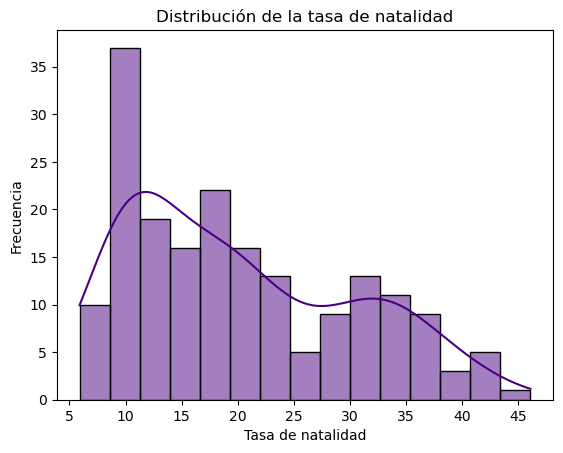

In [11]:
sns.histplot(df['birth_rate'], bins=15, kde=True, color = "indigo")

plt.title("Distribución de la tasa de natalidad")
plt.xlabel("Tasa de natalidad")
plt.ylabel("Frecuencia")
plt.show()

- más frecuencia: hay más paises con la tasa de natalidad entre 8 y 12
- menos frecuencia: menos paises con la tasa de natalidad por en cima de 38
- tendencia: cuánto más alta la tasa de natalidad menos paises

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

In [12]:
df['infant_mortality'].dtypes

dtype('float64')

In [13]:
df['life_expectancy'].dtypes

dtype('float64')

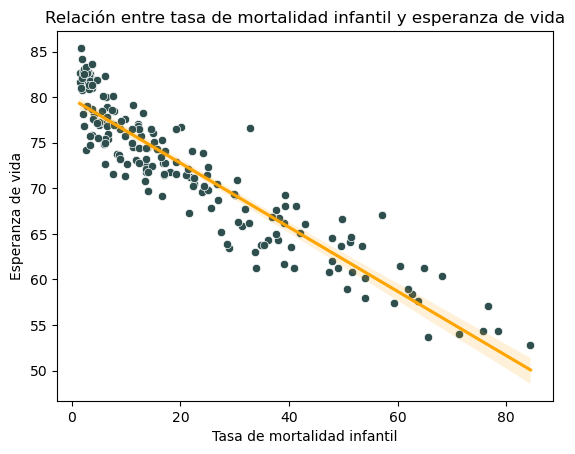

In [15]:
# scatter plot para 2 variables numéricas (float64):

sns.scatterplot(x='infant_mortality', y='life_expectancy', data=df, color = "darkslategray")
sns.regplot(x='infant_mortality', y='life_expectancy', data=df, scatter=False, line_kws={'color':'orange'})

plt.title("Relación entre tasa de mortalidad infantil y esperanza de vida")
plt.xlabel("Tasa de mortalidad infantil")
plt.ylabel("Esperanza de vida")
plt.show()

- tendencia: cuánto más alta es la tasa de mortalidad infantil, más baja es la esperanza de vida
- más frecuencia: hay más concentración de datos entre la tasa de mortalidad infantil (0 - 20) y la esperanza de vida (70 - 85)

3. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [17]:
df_euro = df[df['continent'] == 'Europe']

Mediana: 80.9
Rango intercuartil: 76.3 - 82.19999999999999
Valores atípicos: menores de 67.45000000000002 o mayores de 91.04999999999998


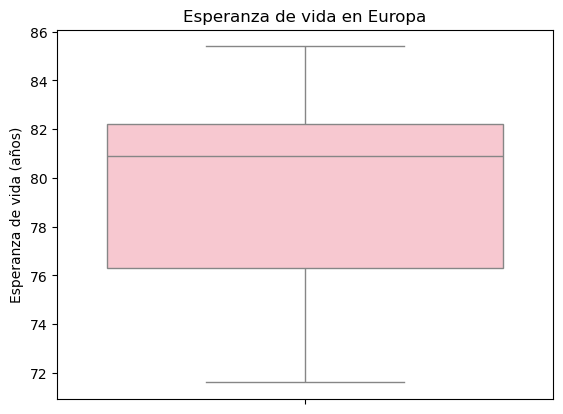

In [26]:
desc = df_euro['life_expectancy'].describe()
median = df_euro['life_expectancy'].median()
q1 = desc['25%']
q3 = desc['75%']
iqr = q3 - q1
print(f"Mediana: {median}")
print(f"Rango intercuartil: {q1} - {q3}")
print(f"Valores atípicos: menores de {q1 - 1.5*iqr} o mayores de {q3 + 1.5*iqr}")


sns.boxplot(y='life_expectancy', data=df_euro, color="pink")
plt.title("Esperanza de vida en Europa")
plt.ylabel("Esperanza de vida (años)")
plt.show()


4. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.


Natalidad x Mortalidad:
- más frecuente: hay más países con la tasa de natalidad entre 5 y 20 y la tasa de mortalidad infantil entre 0 y 20.
- tendencia: en países donde la tasa de natalidad es alta, la tasa de mortalidad también suele ser alta.



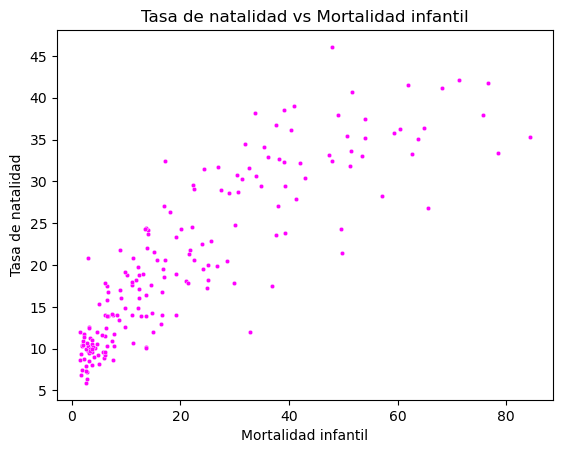


Natalidad x Esperanza de vida: 
- más frecuencia: hay más paises con la tasa de natalidad entre 5 - 20 y la la esperanza de vida entre los 72 y los 83 años
- tendencia: en paises que la tasa de natalidad es baja, la esperanza de vida es alta



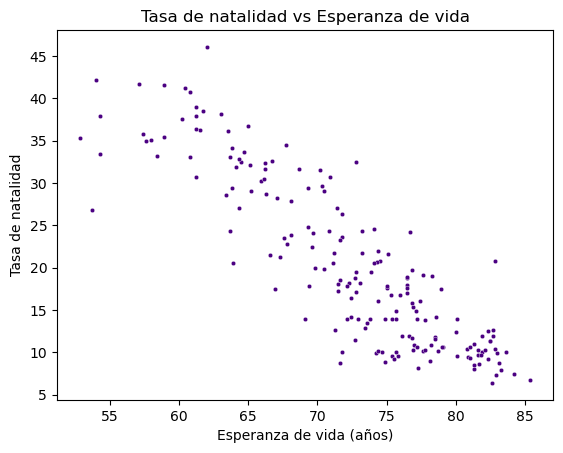


Natalidad x Densidad de población:
- la mayoría de los países se encuentran con densidades de población entre 0 y 200. Dentro de ese rango, la tasa de natalidad varía bastante, aproximadamente entre 5 y 45.
- no parece haber una relación fuerte entre densidad y natalidad.
- hay una ligera tendencia negativa: a medida que la densidad aumenta mucho, la tasa de natalidad tiende a bajar, pero con bastante dispersión.



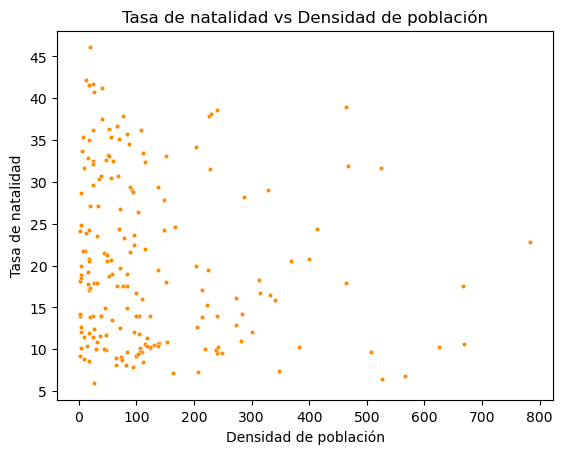

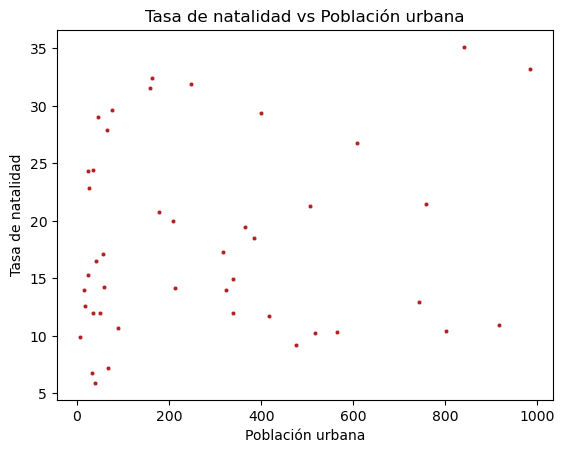

In [45]:
print("""
Natalidad x Mortalidad:
- más frecuente: hay más países con la tasa de natalidad entre 5 y 20 y la tasa de mortalidad infantil entre 0 y 20.
- tendencia: en países donde la tasa de natalidad es alta, la tasa de mortalidad también suele ser alta.
""")

sns.scatterplot(x=df['infant_mortality'], y=df['birth_rate'], s=10, color='fuchsia')
plt.title("Tasa de natalidad vs Mortalidad infantil")
plt.xlabel("Mortalidad infantil")
plt.ylabel("Tasa de natalidad")
plt.show()


print("""
Natalidad x Esperanza de vida: 
- más frecuencia: hay más paises con la tasa de natalidad entre 5 - 20 y la la esperanza de vida entre los 72 y los 83 años
- tendencia: en paises que la tasa de natalidad es baja, la esperanza de vida es alta
""")
sns.scatterplot(x=df['life_expectancy'], y=df['birth_rate'], s=10, color='indigo')
plt.title("Tasa de natalidad vs Esperanza de vida")
plt.xlabel("Esperanza de vida (años)")
plt.ylabel("Tasa de natalidad")
plt.show()

print("""
Natalidad x Densidad de población:
- la mayoría de los países se encuentran con densidades de población entre 0 y 200. Dentro de ese rango, la tasa de natalidad varía bastante, aproximadamente entre 5 y 45.
- no parece haber una relación fuerte entre densidad y natalidad.
- hay una ligera tendencia negativa: a medida que la densidad aumenta mucho, la tasa de natalidad tiende a bajar, pero con bastante dispersión.
""")
sns.scatterplot(x=df['density'], y=df['birth_rate'], s=10, color='darkorange')
plt.title("Tasa de natalidad vs Densidad de población")
plt.xlabel("Densidad de población")
plt.ylabel("Tasa de natalidad")
plt.show()

sns.scatterplot(x=df['urban_population'], y=df['birth_rate'], s=10, color='firebrick')
plt.title("Tasa de natalidad vs Población urbana")
plt.xlabel("Población urbana")
plt.ylabel("Tasa de natalidad")
plt.show()
